In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
ps = pd.read_csv('/content/drive/MyDrive/DS/DataSets/googleplaystore.csv')

# **EDA And Feature Engineering Of Google Play Store Dataset**

The data consists of 20 column and 10841 rows.


## **Problem Statement 1: Market Overview**

Objective:
Analyze the overall distribution of apps across categories to understand market saturation and demand.

Key Questions:

- Which categories have the highest number of apps?
- Which categories receive the highest installs and reviews?
- Are some categories overcrowded but low-demand?

## **Problem Statement 2: Category Leadership Analysis**

Objective:
Identify leading apps within each major category using engagement and popularity metrics.

Key Questions:

- Which apps dominate installs and reviews within top categories?
- Is leadership concentrated or fragmented?
- Do top apps also have high ratings, or just high installs?

## **Problem Statement 3: Pricing & Monetization Insights**

Objective:
Evaluate whether paid apps perform better or worse than free apps.

Key Questions:
- What proportion of apps are paid vs free?
- How do ratings, installs, and reviews differ between paid and free apps?
- Are high-priced apps associated with better perceived quality?

## **Problem Statement 4: Rating & Quality Drivers**

Objective:
Explore which app attributes are associated with higher ratings.

Key Questions:

- Do apps with more reviews tend to have higher ratings?
- Does app size influence ratings or installs?
- Does content rating (Everyone, Teen, Mature) affect popularity?

## **Problem Statement 5: Strategic Opportunity Identification**

Objective:
From an investor or founder perspective, identify promising app categories.

Key Questions:

- Which categories show high demand but relatively fewer competitors?
- Which categories maintain consistently high ratings?
- Where might a new app have a realistic chance to succeed?



In [166]:
ps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [167]:
ps.shape

(10841, 13)

In [168]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [169]:
df = ps.copy()

## **Summary of the Data**
In this data, there are 10841 rows and 13 columns.
This dataset contains metadata about Android applications listed on the Google Play Store, including category, pricing model, user ratings, installs, size, and content classification. It represents the market-level characteristics of apps rather than individual user behavior.




# **Columns Description**

`App`: Contains name of the apps  
`Category`: Contains different categories like ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', etc.  
`Rating`: Tells about the rating of the app given by the users.  
`Reviews`: Gives the review count of the app.  
`Size`: Tells about the storage size.  
`Installs`: Tells How many users have installed the app.  
`Type`: Tells if the app is Free or Paid.  
`Price`: Cost of the app.  
`Content Rating`:  age-based maturity ratings that signal what kind of content. an app may contain and which age group it is most appropriate for.  
`Genres`: Tells about the genre of the app.  
`Last Updated`: latest update date  
`Current Ver`: Version of the app.  
`Android Ver`: Which andriod version it supports.




In [170]:
df.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8126,Camera360 Lite - Selfie Camera,PHOTOGRAPHY,4.4,221878,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 1, 2018",Varies with device,4.1 and up
8524,The DL Hughley Show,FAMILY,4.3,23,11M,"5,000+",Free,0,Everyone,Entertainment,"May 29, 2018",3.1.2,5.0 and up
10499,HD Themes Toyota Cruiser 100VX,PERSONALIZATION,NaN,2,16M,100+,Free,0,Teen,Personalization,"September 30, 2016",1.0,2.3.3 and up
7485,CK Call NEW,COMMUNICATION,NaN,0,4.2M,10+,Free,0,Everyone,Communication,"April 26, 2017",3.8.8,2.2 and up
1069,MyMo by GSB,FINANCE,4.2,21996,14M,"1,000,000+",Free,0,Everyone,Finance,"July 19, 2018",1.17.2,4.0.3 and up
166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,23M,"5,000,000+",Free,0,Mature 17+,Books & Reference,"June 29, 2018",3.12,4.1 and up
8994,DW فارسی By dw-arab.com,NEWS_AND_MAGAZINES,4.7,11,4.4M,"1,000+",Free,0,Everyone,News & Magazines,"March 26, 2017",1.0.0,4.1 and up


## **Issues with the Data**

## Important Note:
During data inspection, multiple records were found for the same app–category–genre combination. These records were identical across most attributes and differed mainly in review counts, indicating that they represent multiple temporal snapshots of the same app rather than distinct entities.
Therefore, the record with the highest number of reviews was kept, as review count serves as a reasonable proxy for the most recent and most engaged state of an app. Using this approach, 1,094 duplicate records were removed and copy was created to keep that data.



---
Quality -> Completeness  
Tidiness  
Quality -> Validity  
Quality -> Accuracy  
Quality -> Consistency  

### **DIRTY DATA**:  
`app`:
- Emoji along with the name (row 2131) `tidiness`

`category`:
- The dataset contains 85 apps listed under multiple categories, indicating that category assignments are not mutually exclusive (made a df_category where no drop of duplicates) `tidiness`
- Data shifted towards right at row 10472. Also its category should be lifestyle `tidiness`

`rating`:
- 1464 data is missing ie 15% `completeness`

`size`:
- 1250 missing values ie 12% `completeness`

`installs`:
- contains '+' and ',' `tidiness`  

`price`:
- $ sign `tidiness`

`last_updated`:
- not in datetime format `validity`

`current_ver`:
- 8 null values `completeness`

`android_ver`:
- 2 null values `completeness`

### **MESSY DATA**:

`genres`:
- 2 different genres in same column







In [171]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          9367 non-null   float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10841 non-null  object 
 6   type            10840 non-null  object 
 7   price           10841 non-null  object 
 8   content_rating  10840 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
 11  current_ver     10833 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [173]:
df['app'].sample(10)

,app
5198,Puck AI Personal Assistant Robot
1052,KTB Netbank
6524,BN Pro LcdD HD Text
2230,ABCmouse.com
9825,ET Markets : NSE & BSE India
10554,PRO MX MOTOCROSS 2
7156,CD Events
2929,Pic Collage - Photo Editor
10038,GO Launcher EX UI5.0 theme
7926,Tech CU Card Manager


In [174]:
exact_dupes = df[df.duplicated(keep=False)]
exact_dupes.shape

(893, 13)

In [175]:
df.duplicated(subset=['app','category','genres']).sum()

np.int64(1094)

In [176]:
df_category = df.copy()   # multi-category apps


In [177]:
rows_before = df.shape[0]
df = (
    df.sort_values(by='reviews', ascending=False)
      .drop_duplicates(subset=['app', 'category', 'genres'], keep='first')
)
rows_after = df.shape[0]
print(f"Rows removed: {rows_before - rows_after}")

Rows removed: 1094


In [178]:
df[df.duplicated()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


In [179]:
df = df.sort_index()

In [180]:
(
    df['app']
    .astype(str)
    .str.encode('ascii', 'ignore')
    .str.decode('ascii')
)


,app
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite FREE Live Cool Themes, Hide Apps"
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
10836,Sya9a Maroc - FR
10837,Fr. Mike Schmitz Audio Teachings
10838,Parkinson Exercices FR
10839,The SCP Foundation DB fr nn5n


In [181]:
import re

emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags
    "]+",
    flags=re.UNICODE
)

df['app'] = df['app'].astype(str).apply(lambda x: emoji_pattern.sub(' ', x))


In [182]:
df[df.index == 3409]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
3409,icon wallpaper dressup CocoPPa,PERSONALIZATION,4.3,595120,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"July 10, 2018",Varies with device,Varies with device


In [183]:
# category column
df['category'].sample(10)

,category
3572,PRODUCTIVITY
7864,FAMILY
8685,SOCIAL
8331,BUSINESS
3335,TOOLS
4215,TOOLS
8670,GAME
9438,FAMILY
2074,FAMILY
5795,GAME


In [184]:
df['category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [185]:
df[df['category']=='1.9']

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [186]:
df.loc[[10472],'category':] = df.loc[[10472],'category':].shift(periods=1,axis = 1)


/tmp/ipython-input-739774032.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1.9']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[[10472],'category':] = df.loc[[10472],'category':].shift(periods=1,axis = 1)


In [187]:
df.loc[[10472],'category'] = df.loc[[10472],'category'].fillna('LIFESTYLE')

In [188]:
df[df['category'].isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver


In [189]:
# Rating column
df['rating'].sample(5)

,rating
8807,3.4
9398,4.1
3552,4.0
7745,NaN
9869,3.4


In [190]:
df['rating'].isna().sum()

np.int64(1464)

In [191]:
df['rating'].isna().sum()/9747*100

np.float64(15.020006155740228)

In [192]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [193]:
df['rating'].describe()

,rating
count,8283.000000
mean,4.174719
std,0.535211
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [194]:
# reviews column
df['reviews'].head()

,reviews
0,159
1,967
2,87510
3,215644
4,967


In [195]:
df['reviews'].sample(10)

,reviews
8749,32881
4064,214265
7922,1992
5757,1
9992,2
4927,45
1992,2750645
7553,953790
1184,6118
10153,260


In [196]:
df['reviews'].info()

<class 'pandas.core.series.Series'>
Index: 9747 entries, 0 to 10840
Series name: reviews
Non-Null Count  Dtype 
--------------  ----- 
9747 non-null   object
dtypes: object(1)
memory usage: 410.3+ KB


In [197]:
df['reviews'].describe()

,reviews
count,9747
unique,5408
top,0
freq,593


In [198]:
df['reviews'] = df['reviews'].astype(float)

In [199]:
# size column
df['size'].sample(7)

,size
7241,103k
6020,2.8M
1961,32M
9186,18M
5540,99M
8428,14M
5842,1.9M


In [200]:
(df['size'] == 'Varies with device').sum()

np.int64(1250)

In [201]:
def convert_size(size):
    if size.endswith('M'):
        return float(size.replace('M', ''))
    elif size.endswith('k'):
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

df['size'] = df['size'].apply(convert_size)


In [202]:
df['size'].isna().sum()/df['size'].size*100

np.float64(12.82445880783831)

In [203]:
# install column
df['installs'].sample(7)

,installs
2679,"10,000,000+"
10015,"10,000,000+"
7230,10+
1845,"10,000,000+"
2399,"10,000+"
1261,"10,000,000+"
30,"100,000+"


In [204]:
df['installs'].info()

<class 'pandas.core.series.Series'>
Index: 9747 entries, 0 to 10840
Series name: installs
Non-Null Count  Dtype 
--------------  ----- 
9747 non-null   object
dtypes: object(1)
memory usage: 410.3+ KB


In [205]:
df['installs'].isna().sum()

np.int64(0)

In [206]:
df['installs'].describe()

,installs
count,9747
unique,21
top,"1,000,000+"
freq,1430


In [207]:
def convert_installs(x):
    return x.replace(',', '').replace('+', '')

df['installs'] = df['installs'].apply(convert_installs).astype(int)


In [208]:
# type column
df['type'].value_counts()

,count
type,
Free,8988
Paid,758


In [209]:
df[df['type'].isna()]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [210]:
df.loc[df['app'] == 'Command & Conquer: Rivals', 'type'] = 'Free'

In [211]:
df.drop(9148, inplace=True)

In [212]:
# price column
df['price'].sample(7)

,price
6202,$4.99
2159,0
9769,0
4413,$2.99
5049,0
2227,0
1992,0


In [213]:
df['price'].info()

<class 'pandas.core.series.Series'>
Index: 9746 entries, 0 to 10840
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
9746 non-null   object
dtypes: object(1)
memory usage: 152.3+ KB


In [214]:
df['price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$11.99',
       '$1.00', '$29.99', '$14.99', '$2.49', '$10.99', '$1.50', '$15.99',
       '$79.99', '$10.00', '$16.99', '$74.99', '$5.49', '$33.99',
       '$24.99', '$12.99', '$39.99', '$19.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [215]:
df['price'] = df['price'].str.replace('$', '', regex=False).astype(float)

In [216]:
df['content_rating'].sample(7)

,content_rating
2532,Everyone
8018,Everyone
5635,Teen
6602,Everyone
9023,Everyone
6548,Everyone
6937,Everyone


In [217]:
df['content_rating'].describe()

,content_rating
count,9746
unique,6
top,Everyone
freq,7956


In [218]:
df['content_rating'].isna().sum()

np.int64(0)

In [219]:
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [220]:
genres_split = df['genres'].str.split(';', expand=True)

genres_split[1] = genres_split[1].where(genres_split[1] != genres_split[0],None)

idx = df.columns.get_loc('genres')
df.insert(idx + 1, 'primary_genre', genres_split[0])
df.insert(idx + 2, 'secondary_genre', genres_split[1])


In [221]:

with pd.option_context('display.max_rows', None):
    display(df[df['secondary_genre'].notnull()][['primary_genre','secondary_genre']])

,primary_genre,secondary_genre
1,Art & Design,Pretend Play
4,Art & Design,Creativity
9,Art & Design,Creativity
23,Art & Design,Action & Adventure
26,Art & Design,Creativity
36,Art & Design,Creativity
43,Art & Design,Creativity
301,Comics,Creativity
705,Education,Creativity
711,Education,Creativity


In [222]:
df.drop(columns=['genres'],inplace=True)

In [223]:
# last_updated column
df['last_updated'].sample(10)

,last_updated
6375,"December 7, 2017"
6,"April 26, 2018"
9756,"February 26, 2018"
10273,"August 6, 2016"
4430,"July 23, 2018"
8098,"February 5, 2018"
2479,"July 23, 2018"
968,"June 20, 2018"
3182,"July 25, 2018"
391,"August 3, 2018"


In [224]:
df['last_updated'].info()

<class 'pandas.core.series.Series'>
Index: 9746 entries, 0 to 10840
Series name: last_updated
Non-Null Count  Dtype 
--------------  ----- 
9746 non-null   object
dtypes: object(1)
memory usage: 410.3+ KB


In [225]:
df['last_updated'].describe()

,last_updated
count,9746
unique,1377
top,"August 3, 2018"
freq,257


In [226]:
df['last_updated'].isna().sum()

np.int64(0)

In [227]:
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')


In [228]:
# current_ver column
df['current_ver'].sample(7)

,current_ver
7160,1.0
5354,3.0
4174,7.0
497,4.4B
3410,Varies with device
5260,1.1
6393,1.4.8


In [229]:
df['current_ver'].info()

<class 'pandas.core.series.Series'>
Index: 9746 entries, 0 to 10840
Series name: current_ver
Non-Null Count  Dtype 
--------------  ----- 
9738 non-null   object
dtypes: object(1)
memory usage: 410.3+ KB


In [230]:
df['current_ver'].isna().sum()

np.int64(8)

In [231]:
# android_ver column
df['android_ver'].tail()

,android_ver
10836,4.1 and up
10837,4.1 and up
10838,2.2 and up
10839,Varies with device
10840,Varies with device


In [232]:
df['android_ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [233]:
df['android_ver'].isna().sum()

np.int64(2)

# **EDA**


In [234]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print(f"We have {len(numeric_features)} numeric features: {numeric_features}")
print(f"We have {len(categorical_features)} numeric features: {categorical_features}")

We have 6 numeric features: ['rating', 'reviews', 'size', 'installs', 'price', 'last_updated']
We have 8 numeric features: ['app', 'category', 'type', 'content_rating', 'primary_genre', 'secondary_genre', 'current_ver', 'android_ver']


In [235]:
df['app'].dtype

dtype('O')

### **Numerical Column** :

> Add blockquote


rating:
- Ratings are tightly concentrated between 4.0 and 4.5
- Very few low-rated apps, indicating survivorship bias
- Ratings are bounded and slightly left-skewed
- Raw ratings are suitable without transformation

reviews:
- Extremely right-skewed distribution
- Majority of apps have very few reviews
- A small number of apps dominate total reviews
- Log1p transformation is necessary for analysis

log_reviews:
- Distribution becomes smoother and usable
- Preserves low review apps while compressing extremes
- Suitable for correlation with ratings and categories

installs:
- Highly right-skewed with heavy concentration near zero
- Install counts span multiple orders of magnitude
- Raw installs unsuitable for comparison across categories

log_installs:
- Clear multi modal peaks corresponding to install buckets
- Reflects Google Play install tiers (1k, 10k, 100k, 1M+)
- Ideal representation for demand comparison

size:
- Most apps are small to medium sized
- Long right tail indicating few very large apps
- Size contains outliers but no invalid values

price:
- Dominated by free apps (price = 0)
- Paid apps form a very small minority
- Price analysis should be done only for paid apps

---

### **Categorical Column**:
category:
- FAMILY category has the highest number of apps
- Supply is uneven across categories
- Some categories are highly saturated

type:
- Free apps overwhelmingly dominate the market
- Paid apps form a small niche segment

content_rating:
- Majority of apps are rated 'Everyone'
- Teen and Mature categories are significantly smaller
- Adult only content is extremely rare

primary_genre:
- Tools, Entertainment, and Education dominate
- Long tail of niche genres exists
- Genre distribution is fragmented compared to categories


### **Numerical Univariate**

Skewness of rating: -1.7551528233919376
Skewness of reviews: 24.066329214916333
Skewness of size: 1.6388091059847971
Skewness of installs: 14.505622558187918
Skewness of price: 22.631444661779888


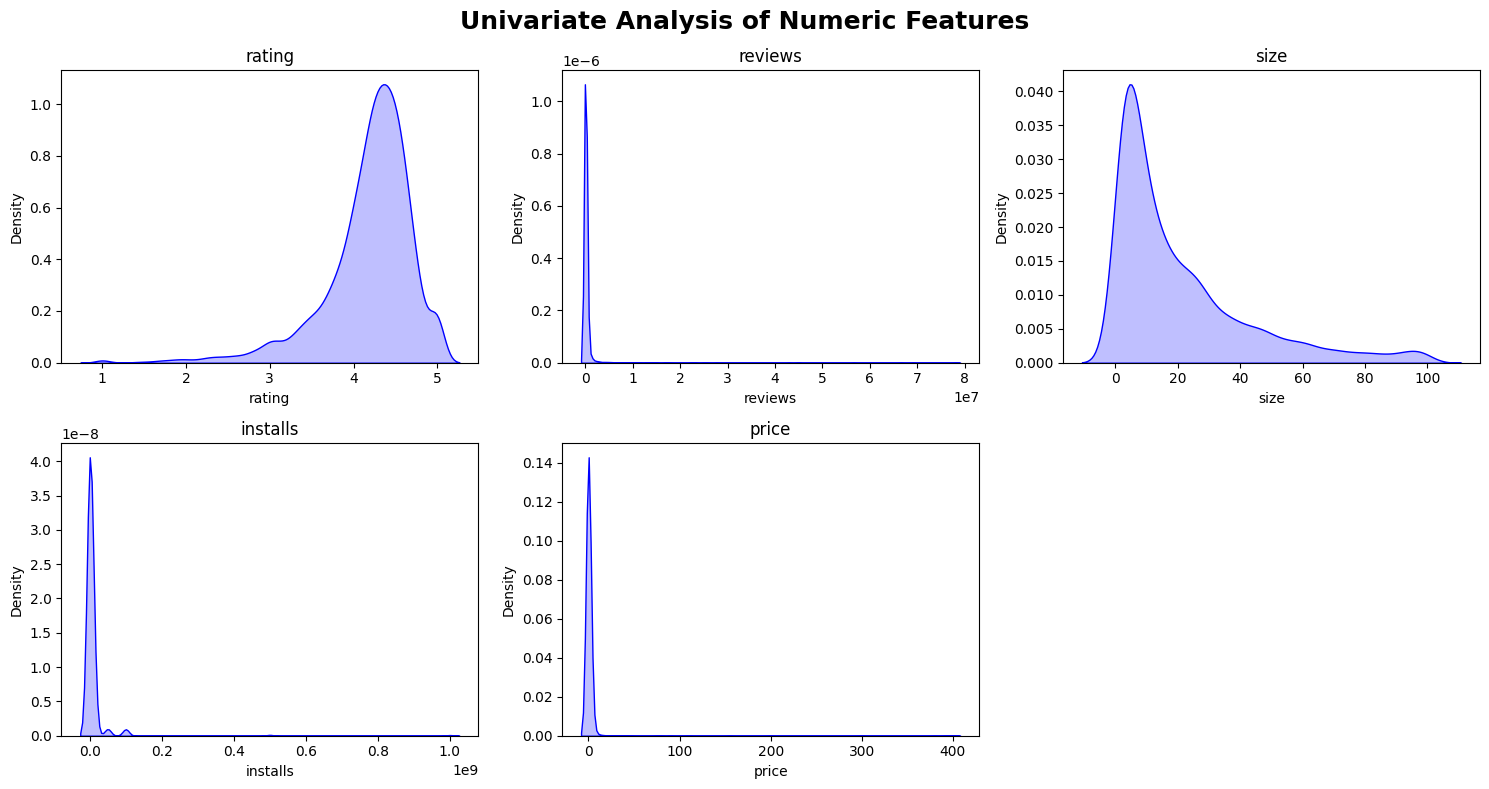

In [236]:
plt.figure(figsize=(15, 8))
plt.suptitle("Univariate Analysis of Numeric Features",fontsize=18,fontweight='bold')
for i in range(0,len(numeric_features)):
  if df[numeric_features[i]].dtype != '<M8[ns]':
    print(f"Skewness of {numeric_features[i]}: {df[numeric_features[i]].skew()}")
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(df[numeric_features[i]].dropna(),color='blue',fill=True)
    plt.title(numeric_features[i])

plt.tight_layout()
plt.show()

In [237]:
df['log_reviews'] = np.log1p(df['reviews'])
df['log_installs'] = np.log10(df['installs'].replace(0, np.nan))



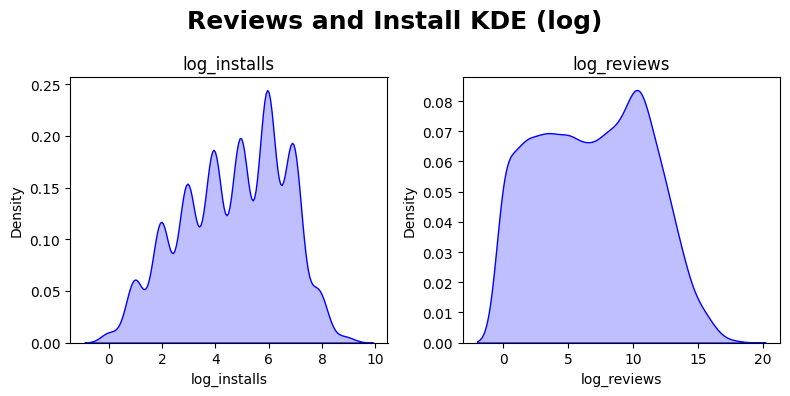

In [238]:
plt.figure(figsize=(8,4))
plt.suptitle("Reviews and Install KDE (log)",fontsize=18,fontweight='bold')
idx =1
for i in range(len(df.columns)-1,len(df.columns)-3,-1):
  plt.subplot(1,2,idx)
  sns.kdeplot(df[df.columns[i]],color='blue',fill=True)
  plt.title(df.columns[i])
  idx+=1

plt.tight_layout()
plt.show()

## **Categorical Univariate**

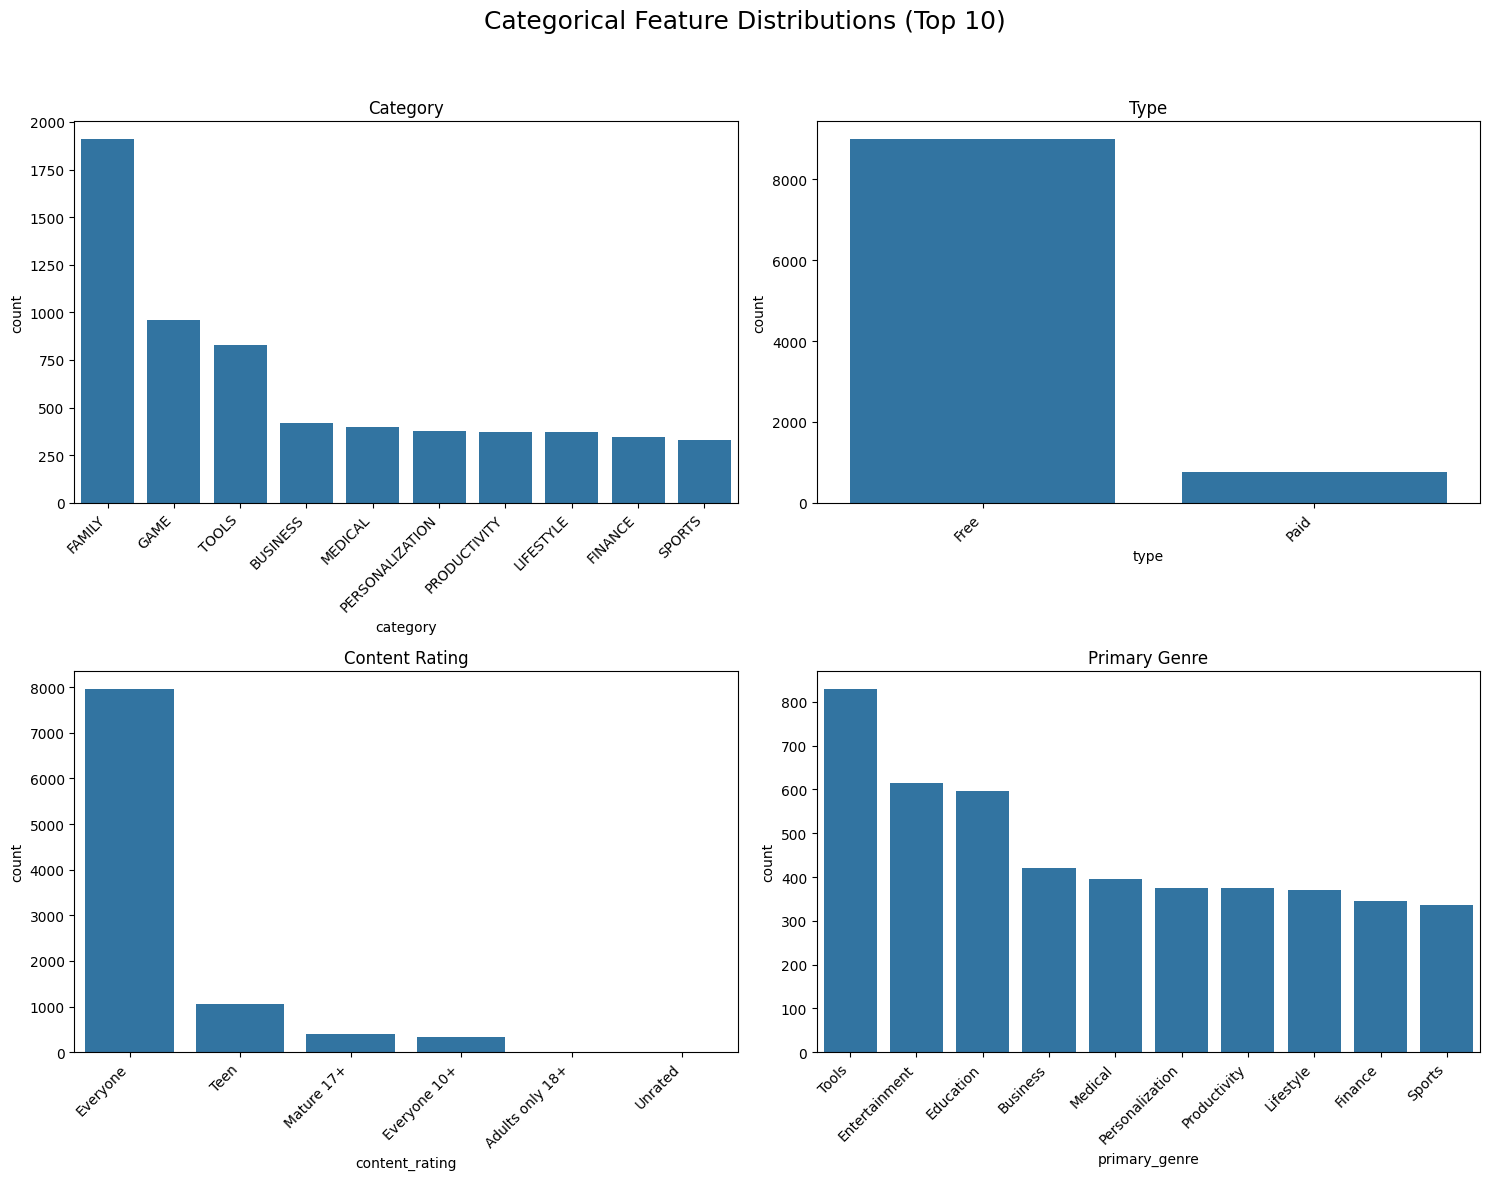

In [239]:
filtered_categorical_features = [
    'category','type','content_rating','primary_genre'
]

import math

n_cols = 2
n_rows = math.ceil(len(filtered_categorical_features) / n_cols)

plt.figure(figsize=(15, 6 * n_rows))
plt.suptitle("Categorical Feature Distributions (Top 10)", fontsize=18)

for i, col in enumerate(filtered_categorical_features, start=1):
    plt.subplot(n_rows, n_cols, i)


    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().head(10).index
    )

    plt.title(col.replace('_', ' ').title())
    plt.xticks(rotation=45, ha="right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# **Problem Statements**

## **Problem Statement 1: Market Overview**
Objective: Analyze the overall distribution of apps across categories to understand market saturation and demand.

Key Questions:

**Which categories have the highest number of apps?**
- **Family** category has the highest number of apps.

**Which categories receive the highest installs and reviews?**
- **Game** category receive the highest installs and reviews.

**Are some categories overcrowded but low-demand?**
- **Medical** and **Business** are overcrowded but have low demand.
- **Family** and **Game** are also overcrowded but their demans are moderate and high respectively.  
- #### **Note**: Analysis shown for top categories by app count.

In [240]:
df.groupby('category')['app'].count().sort_values(ascending=False).head(5)

,app
category,
FAMILY,1908
GAME,961
TOOLS,829
BUSINESS,420
MEDICAL,396


In [241]:
df.groupby('category')[['installs','reviews']].sum().sort_values(by = ['installs','reviews'], ascending=False).head(5)

,installs,reviews
category,,
GAME,13973924415,623898470.0
COMMUNICATION,11039276251,285841611.0
FAMILY,8885642505,346016097.0
TOOLS,8102771915,229471630.0
PRODUCTIVITY,5793091369,55590856.0


In [242]:
category_stats = (df.groupby('category').agg(apps=('app', 'count'),total_installs=('installs', 'sum')))

category_stats['installs_per_app'] = (category_stats['total_installs'] / category_stats['apps'])

In [243]:
category_stats_plot = category_stats.sort_values(by=['apps', 'installs_per_app'],ascending=[False, True]).head(5)
category_stats_plot

,apps,total_installs,installs_per_app
category,,,
FAMILY,1908,8885642505,4.657045e+06
GAME,961,13973924415,1.454102e+07
TOOLS,829,8102771915,9.774152e+06
BUSINESS,420,697164865,1.659916e+06
MEDICAL,396,39193177,9.897267e+04


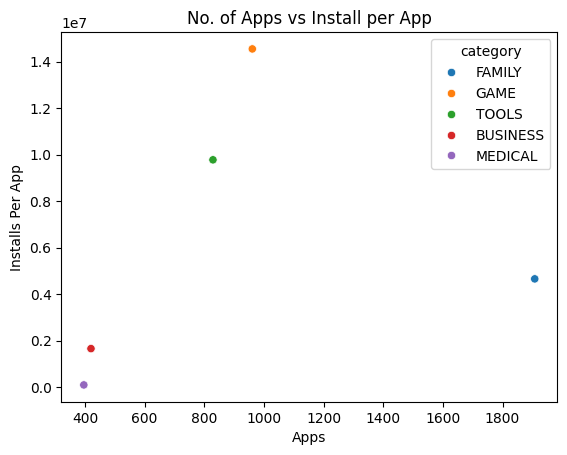

In [244]:
sns.scatterplot(data=category_stats_plot,x='apps',y='installs_per_app',hue='category')
plt.title("No. of Apps vs Install per App")
plt.xlabel("Apps")
plt.ylabel("Installs Per App")
plt.show()

## **Problem Statement 2: Category Leadership Analysis**

Objective:
Identify leading apps within each major category using engagement and popularity metrics.

Key Questions:

**Which apps dominate installs and reviews within top categories?**

- **Communication**: Gmail, Google Chrome, Messenger, WhatsApp, and Skype dominate the category, occupying the highest install brackets and review volumes.
- **Family / Games**: Candy Crush Saga, Clash of Clans, and My Talking Tom consistently lead in both installs and user engagement, indicating strong and sustained popularity.
- **Productivity**: Google Drive, Google Calendar, Cloud Print, and Dropbox emerge as dominant apps, reflecting heavy reliance on ecosystem productivity tools.
- **Tools**: Google, Google Translate, SHAREit, and Clean Master lead the category with extremely high install counts and reviews.

**Note:**  
A significant portion of category dominance is driven by **platform-owned or pre-installed applications** (e.g., Google apps), which benefit from ecosystem advantages. As a result, dominance in these categories should be interpreted as *market presence* rather than competitive fairness.


**Do top apps also have high ratings, or just high installs?**
- The most installed apps generally maintain strong ratings, typically above 4.0. This suggests that successful apps tend to meet a baseline level of quality expectations.

- However, ratings among top apps show limited variation and are not uniformly exceptional. Several highly installed apps achieve dominance due to ecosystem advantages, early adoption, or brand recognition rather than significantly higher ratings.

In [245]:
top_categories = df.groupby('category')[['installs','reviews']].sum().sort_values(by =['installs','reviews'], ascending=False).head(5).index
top_cat_df = df[df['category'].isin(top_categories)]

app_stats = top_cat_df.groupby(['category', 'app'])[['installs','reviews']].sum().sort_values(by =['installs','reviews'], ascending=False)
app_stats.groupby('category').head(5).sort_index()

installs  \
category      app                                                              
COMMUNICATION Gmail                                               1000000000   
              Google Chrome: Fast & Secure                        1000000000   
              Messenger – Text and Video Chat for Free            1000000000   
              Skype - free IM & video calls                       1000000000   
              WhatsApp Messenger                                  1000000000   
FAMILY        Candy Crush Saga                                     500000000   
              Clash of Clans                                       100000000   
              Google Play Games                                   1000000000   
              My Talking Tom                                       500000000   
              Pou                                                  500000000   
GAME          Candy Crush Saga                                     500000000   
              My Talking Tom                                       500000000   
              Pou                                                  500000000   
              Subway Surfers                                      1000000000   
              Temple Run 2                                         500000000   
PRODUCTIVITY  Cloud Print                                          500000000   
              Dropbox                                              500000000   
              Google Calendar                                      500000000   
              Google Drive                                        1000000000   
              Microsoft Word                                       500000000   
TOOLS         Clean Master- Space Cleaner & Antivirus              500000000   
              Google                                              1000000000   
              Google Translate                                     500000000   
              SHAREit - Transfer & Share                           500000000   
              Security Master - Antivirus, VPN, AppLock, Booster   500000000   

                                                                     reviews  
category      app                                                             
COMMUNICATION Gmail                                                4604483.0  
              Google Chrome: Fast & Secure                         9643041.0  
              Messenger – Text and Video Chat for Free            56646578.0  
              Skype - free IM & video calls                       10484169.0  
              WhatsApp Messenger                                  69119316.0  
FAMILY        Candy Crush Saga                                    22419455.0  
              Clash of Clans                                      44881447.0  
              Google Play Games                                    7168735.0  
              My Talking Tom                                      14885236.0  
              Pou                                                 10483141.0  
GAME          Candy Crush Saga                                    22430188.0  
              My Talking Tom                                      14892469.0  
              Pou                                                 10486018.0  
              Subway Surfers                                      27725352.0  
              Temple Run 2                                         8119154.0  
PRODUCTIVITY  Cloud Print                                           282460.0  
              Dropbox                                              1861310.0  
              Google Calendar                                       858230.0  
              Google Drive                                         2731211.0  
              Microsoft Word                                       2084126.0  
TOOLS         Clean Master- Space Cleaner & Antivirus             42916526.0  
              Google                                               8033493.0  
           

In [246]:
top_apps = df.groupby('app')['installs'].sum().sort_values(ascending=False).head(10).index
top_apps = df[df['app'].isin(top_apps)]
top_apps_stats = top_apps.sort_values(by=['installs','rating'],ascending=[False,False]).drop_duplicates(subset=['app'],keep='first')
top_apps_stats

,app,category,rating,reviews,size,installs,type,price,content_rating,primary_genre,secondary_genre,last_updated,current_ver,android_ver,log_reviews,log_installs
1872,Subway Surfers,GAME,4.5,27725352.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,None,2018-07-12,1.90.0,4.1 and up,17.137858,9.00000
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1000000000,Free,0.0,Teen,Social,None,2018-07-31,Varies with device,Varies with device,18.013876,9.00000
2884,Google Photos,PHOTOGRAPHY,4.5,10859051.0,NaN,1000000000,Free,0.0,Everyone,Photography,None,2018-08-06,Varies with device,Varies with device,16.200510,9.00000
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,Free,0.0,Everyone,Communication,None,2018-08-03,Varies with device,Varies with device,18.051345,9.00000
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,NaN,1000000000,Free,0.0,Teen,Entertainment,None,2018-07-16,Varies with device,Varies with device,15.784769,9.00000
2554,Google+,SOCIAL,4.2,4831125.0,NaN,1000000000,Free,0.0,Teen,Social,None,2018-07-26,Varies with device,Varies with device,15.390590,9.00000
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707.0,NaN,1000000000,Free,0.0,Everyone,Travel & Local,None,2018-08-06,Varies with device,Varies with device,14.571495,9.00000
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,None,2018-08-06,Varies with device,Varies with device,13.717219,9.00000
1908,My Talking Tom,GAME,4.5,14892469.0,NaN,500000000,Free,0.0,Everyone,Casual,None,2018-07-19,4.8.0.132,4.1 and up,16.516366,8.69897
1885,Pou,GAME,4.3,10486018.0,24.0,500000000,Free,0.0,Everyone,Casual,None,2018-05-25,1.4.77,4.0 and up,16.165553,8.69897


## **Problem Statement 3: Pricing & Monetization Insights**

Objective:
Evaluate whether paid apps perform better or worse than free apps.

Key Questions:
**What proportion of apps are paid vs free?**
- 7.77%  of the apps are paid.

**How do ratings, installs, and reviews differ between paid and free apps?**
- Paid apps show a slightly higher average rating compared to free apps, indicating marginally better perceived quality or stricter user expectations.

- Free apps dominate in terms of total installs and total reviews since the absence of a price barrier. When normalized by app count, free apps still achieve significantly higher installs per app, highlighting their broader reach and accessibility.


**Are high-priced apps associated with better perceived quality?**

## Are high-priced apps associated with better perceived quality?

High priced apps do not consistently exhibit better perceived quality compared to low or moderately priced apps. While moderate and low-priced apps show slightly higher average ratings, high priced apps do not stand out in terms of rating performance.

- High priced apps receive significantly fewer reviews per app, indicating lower adoption and weaker evidence supporting their ratings.

- Overall, higher pricing does not appear to be associated with superior perceived quality in this dataset.



In [247]:
df['type'].value_counts(normalize=True)*100

,proportion
type,
Free,92.22245
Paid,7.77755


In [248]:
df['app'].count()

np.int64(9746)

In [249]:
df.groupby('type').agg(avg_rating=('rating','mean'), total_installs=('installs','sum'), total_reviews=('reviews','sum'))


,avg_rating,total_installs,total_reviews
type,,,
Free,4.167904,79925873646,2.313721e+09
Paid,4.261056,57865881,6.627171e+06


In [250]:
type_stats = df.groupby('type').agg(avg_rating=('rating', 'mean'),total_installs=('installs', 'sum'),total_reviews=('reviews', 'sum'),app_count=('app', 'count'))

type_stats['installs_per_app'] = type_stats['total_installs'] / type_stats['app_count']

type_stats


,avg_rating,total_installs,total_reviews,app_count,installs_per_app
type,,,,,
Free,4.167904,79925873646,2.313721e+09,8988,8.892509e+06
Paid,4.261056,57865881,6.627171e+06,758,7.634021e+04


In [251]:
price_bins = df[df['price'] > 0]['price'].quantile([0.33, 0.66])
low_cutoff = price_bins.iloc[0]
high_cutoff = price_bins.iloc[1]

In [252]:
def price_group(p):
    if p == 0:
        return 'free'
    elif p <= low_cutoff:
        return 'low_price'
    elif p <= high_cutoff:
        return 'moderate_price'
    else:
        return 'high_price'

df['price_group'] = df['price'].apply(price_group)

In [253]:
price_quality_stats = df.groupby('price_group').agg(avg_rating=('rating', 'mean'),reviews_per_app=('reviews', 'mean'),app_count=('app', 'count'))

price_quality_stats

,avg_rating,reviews_per_app,app_count
price_group,,,
free,4.167904,257423.339898,8988
high_price,4.176768,14975.263158,247
low_price,4.296117,5193.839286,280
moderate_price,4.307921,6380.978355,231


## **Problem Statement 4: Rating & Quality Drivers**

Objective:
Explore which app attributes are associated with higher ratings.

Key Questions:

**Do apps with more reviews tend to have higher ratings?**  
- Apps with a large number of reviews generally exhibit moderately high ratings, most commonly between 4.2 and 4.6. This suggests that widely used apps tend to maintain an acceptable level of perceived quality.

- However, higher review counts do not correspond to exceptionally high ratings.


**Does app size influence ratings or installs?**
- Large size apps have slightly higher average rating so we cant say that size influences the rating
- Installs per app of large size apps is higher than other apps.


**Does content rating (Everyone, Teen, Mature) affect popularity?**  
- Content rating does not show a strong relationship with app ratings. Most content categories, including Everyone, Teen, and Everyone 10+, have very similar average ratings, so content classification alone does not significantly influence perceived quality.

- Higher ratings observed for Adults only 18+ apps should be interpreted cautiously due to their small representation in the dataset. Overall, popularity and user perception appear to be driven more by app functionality and category than by content rating.


In [254]:
q90 = df['reviews'].quantile(0.9)
print(df[df['reviews']>=q90]['rating'].value_counts())

rating
4.5    201
4.4    191
4.3    168
4.6    136
4.2    103
4.7     60
4.1     42
4.0     28
4.8     19
3.7      9
3.9      8
3.8      4
3.3      3
4.9      2
3.6      1
Name: count, dtype: int64


In [255]:
pd.qcut(df['size'],q=3,labels=['Low','Moderate','High'], retbins=True)

(0        Moderate
 1        Moderate
 2        Moderate
 3            High
 4             Low
            ...   
 10836        High
 10837         Low
 10838    Moderate
 10839         NaN
 10840    Moderate
 Name: size, Length: 9746, dtype: category
 Categories (3, object): ['Low' < 'Moderate' < 'High'],
 array([8.30078125e-03, 6.40000000e+00, 2.20000000e+01, 1.00000000e+02]))

In [256]:
df['size_category'] = pd.qcut(
    df['size'],
    q=3,
    labels=['Low', 'Moderate', 'High']
)


In [257]:
size_stats = df.groupby('size_category').agg(rating=('rating','mean'),install=('installs','sum'))
app_counts = df.groupby('size_category')['app'].count()

size_stats['install_per_app'] = (size_stats['install'] / app_counts).round(2)

size_stats =size_stats.drop(columns='install')
size_stats

/tmp/ipython-input-2498466921.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_stats = df.groupby('size_category').agg(rating=('rating','mean'),install=('installs','sum'))
/tmp/ipython-input-2498466921.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_counts = df.groupby('size_category')['app'].count()


,rating,install_per_app
size_category,,
Low,4.122878,834443.81
Moderate,4.164991,3167592.20
High,4.194890,8131824.53


In [258]:
df.groupby('size_category')['app'].count()

/tmp/ipython-input-895566164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('size_category')['app'].count()


,app
size_category,
Low,2836
Moderate,2883
High,2778


In [259]:
df.groupby('content_rating')['rating'].mean().sort_values(ascending=False)

,rating
content_rating,
Adults only 18+,4.300000
Everyone 10+,4.231661
Teen,4.226152
Everyone,4.167586
Mature 17+,4.121849
Unrated,4.100000


## **Problem Statement 5: Strategic Opportunity Identification**

Objective:
From an investor or founder perspective, identify promising app categories.

Key Questions:

**Which categories show high demand but relatively fewer competitors?**
- **High demand (installs per app):** No category fell into the top demand quartile (Q4), indicating the absence of extreme outliers. Therefore, categories in Q3 were treated as the highest relative demand group.
- **Low competition (app count):** The WEATHER category lies in the lowest quartile (Q1) for app count, meaning it has comparatively fewer competing apps.



**Which categories maintain consistently high ratings?**
## Which categories maintain consistently high ratings?

- Categories were evaluated using **average rating** for quality and **rating standard deviation** for consistency.
- The **top quartile of average ratings** and **bottom quartile of rating variability** were used to identify consistently high-rated categories.
- In the scatter plot, categories in the **bottom-right region** represent high ratings with low variability.
- **Education, Personalization, and Game** fall into this region, indicating stable and consistently high perceived quality across apps.


**Where might a new app have a realistic chance to succeed?**
- No category simultaneously exhibits very high demand and very low competition.
- This indicates that demand and competition tend to increase together, suggesting that new apps must compete in active markets rather than rely on underserved categories.


In [276]:
#Q1
category_stats = df.groupby('category').agg(
    total_installs=('installs', 'sum'),
    installs_per_app=('installs', 'mean'),
    app_count=('app', 'count')
)

In [261]:
category_stats['installs_percentile'] = pd.qcut(category_stats['installs_per_app'],q =4, labels = ['Q1','Q2','Q3','Q4'])
category_stats['app_count_percentile'] = pd.qcut(category_stats['app_count'],q =4, labels = ['Q1','Q2','Q3','Q4'])
category_stats.head()

,total_installs,installs_per_app,app_count,installs_percentile,app_count_percentile
category,,,,,
ART_AND_DESIGN,114338100,1.786533e+06,64,Q2,Q1
AUTO_AND_VEHICLES,53130211,6.250613e+05,85,Q1,Q1
BEAUTY,27197050,5.131519e+05,53,Q1,Q1
BOOKS_AND_REFERENCE,1665969576,7.504367e+06,222,Q3,Q3
BUSINESS,697164865,1.659916e+06,420,Q2,Q4


In [262]:
category_stats[(category_stats['installs_percentile']=='Q4') & (category_stats['app_count_percentile']=='Q1')]

,total_installs,installs_per_app,app_count,installs_percentile,app_count_percentile
category,,,,,


In [263]:
category_stats[(category_stats['installs_percentile']=='Q3') & (category_stats['app_count_percentile']=='Q1')]

,total_installs,installs_per_app,app_count,installs_percentile,app_count_percentile
category,,,,,
WEATHER,361100520,4.570893e+06,79,Q3,Q1


In [272]:
#Q2 & Q3
category_rating = df.groupby('category').agg(avg_rating= ('rating','mean'),rating_std = ('rating','std'),app_count=('app','count')).sort_values(by='avg_rating',ascending=False)


In [265]:
high_avg_rating = category_rating['avg_rating'].quantile(0.75)
low_variability = category_rating['rating_std'].quantile(0.25)
apps_rate = category_rating['app_count'].quantile(0.25)

category_rating[(category_rating['avg_rating']>=high_avg_rating) & (category_rating['rating_std']<=low_variability) & (category_rating['app_count']>=apps_rate)]

,avg_rating,rating_std,app_count
category,,,
EDUCATION,4.364407,0.263612,119
PERSONALIZATION,4.332215,0.358968,376
GAME,4.247374,0.383588,961


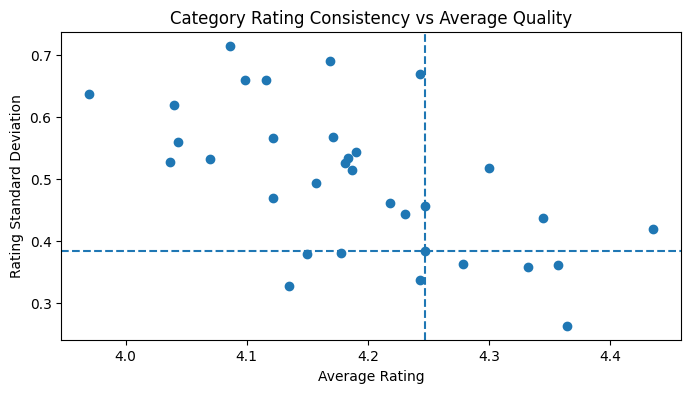

In [275]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.scatter(
    category_rating['avg_rating'],
    category_rating['rating_std']
)

plt.axhline(category_rating['rating_std'].quantile(0.25),linestyle='--')

plt.axvline(category_rating['avg_rating'].quantile(0.75),linestyle='--')

plt.xlabel('Average Rating')
plt.ylabel('Rating Standard Deviation')
plt.title('Category Rating Consistency vs Average Quality')

plt.show()
